## Nerual Networks in Julia

This is a file that explores the use of nerual networks in Julia. This does not feature any packages outside of the functions that are aleardy build into Julia itself. The project here goes into building a nerual network, creating an activation function, forward network model and a backwards network model using backpropagation. For this network, we will be working with multilayer perceptron model or a normal nerual network or a Artifical Neural Network. 

___

Neural networks can have thousands of weights that are individually changed in value through training to minimize error. There are several ways to defind a nerual network with the amount of weights to the size of the layers that are within the algorithm. 







<div style="text-align:center"><img src="https://miro.medium.com/max/1313/1*ZB6H4HuF58VcMOWbdpcRxQ.png" /></div>

The basic network with have 3 main layers - Input layer, Hidden layers and Output layer.
<ul>
<li>Input (x): First layer that feeds input into the network.</li>
<li>Output (y): Set of nodes that will direct the output of the model. Can be of one or muliple nodes as output, depending on model. </li>
<li>Hidden Layers: The set of nodes that is placed in between the output and input layers. The size of the layer will vary and output diffrent values based on the size. </li>
</ul>




**Perceptron Extention** - Combination of Multiple Perceptron Models. The creation of a newwork of perceptrons. Inital input is fed to a set of nodes in the hidden layers. Output from the hidden layers can be sent to another hidden or an output layer. A set of perceptrons joined together in multiple layers. 



___

#### There are some of the variables we will be working with today in our model:

<ul>
<li>Training data: The data that is used to train our model</li>
<li>Testing data: This is a secret hidden data that is used to evaluate our model. </li>
<li>Lost funciton: The function to quantify the accuracy of our model (Cross entropy)</li>
<li>Optimization: The function to control and adjust the weights of during training. (Sigmoid)</li>
</ul>


___
### Dataset: MNIST

We will be working with the Modified National Institute of Standards and Technology database (MNIST) for this model. The MNIST is a large database of a total 70,000 handwritten images, that is split into train and test portions. A picture of the dataset represtnation is shown below. 


<div style="text-align:center"><img src="https://miro.medium.com/max/1095/1*2lSjt9YKJn9sxK7DSeGDyw.jpeg" /></div>


Each one of these 70,000 images in this dataset is a (28 x 28 x 1 ) in size representing each pixel in each image. Each individual pixel conatins a value between 0 and 1, representing the grayscale of the pixel. For this dataset, higher the value that is within the dataset the higher the representation of pixel density detected in this dataset. This would mean number closer to one will produce a darker value than of one closer to 0. The goal of this network is to take in the 28 x 28 pixal size images to classify the right output digit.


___
Below we load our packages and look at the first image in the dataset.

In [1]:
using MLDatasets
using Plots
using Images
using TestImages

In [2]:
#load the train and test datasets into julia
train_x, train_y = MNIST.traindata()
test_x,test_y = MNIST.testdata();

In [3]:
#view the matrix of the first value in the test dataset.
train_x[:,:,1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

Above we have the grayscale matrix of the first entry in the dataset. We can see many of the values are of 0.0 where there is no representaion of grayscale on the image while we also have .90 values that do show the existance of grayscale in our image. We can place this in a function of colorview to see the image itself in grayscale.

First  image in train dataset is 5


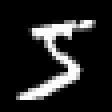

In [4]:
println("First  image in train dataset is ", train_y[1])
colorview(Gray, train_x[:,:,1]')

Above the the grayscale image based on the matrix values that were listed beforehand. 

___

Before we make our model, we must fix our data inorder to fit into our model. We can not put the matrix into this model, so we will have to reshape our matrix into a vector form for each image. This will allow for us to for our model since this is a fully connected network. We will need to flatten the matrix to a single vector for the computer to see the data sets. 

We will also create a vector of outputs for our model. For this, we create a vector of 10 numbers that corresponds with each of the output that is possible (0-9). 

___

In [5]:
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:,:,i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
    end 
train_data = [x for x in zip(X,Y)]

X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:,:,i], 784))
    y = zeros(10)
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
    end 
test_data = [x for x in zip(X,Y)];

___
The code below is us creating our activation function and nerual network for the model. We will be using the sigmoid function because of the output of the values between 0 and 1 and for us to defind the gradient for the network as we find the optimal minimum. Using the gradient, we are able to use the sigmoid and the derivative of the sigmoid fucntion. 



We will create a neural network of a mutable struct that can be modified. This network will have only two modified variables of W (weights) and b (bias). 

Lastly, we have a create network function that will accpet an array of the layer size and return a created network of nodes with random values. The first layer for this model will be of 784 nodes while last will be of 10. The hidden layers are of further exploration to build our model

___


In [6]:
#activation function and its derivative
σ(x) = 1.0/(1.0 + exp(-x))

dσ(x) = σ(x) * (1 - σ(x))


#defind a neural network object
mutable struct neural_network
    W
    b
end 

#inital the W and b
function create_network(input_layer_size, hidden_layer_size, output_layer_size)
    """ Function to create the the network compostion of the neural network. This can be created with as many layers as the input and output.
        For this function, we use random weights to initialize the network while updating it as we train over time
    
    Args:
        input_layer_size ([int]): Input of an int that is the starting or the first layer of the network. 
    
        Hidden_layer_size ([array]): Input of an array of the hidden layers of the network. This can be an n size array for the hidden layers  
    
        output_layer_size  [(int)]:   Input the size of the output layer of the neural network. This can be 0 or 1 for a binary or other n size ammount for any other model.
    
    Output:
        Returns the final weights or classifcation of the neural network. 
    
    
    """

    W = [[0.0], randn(hidden_layer_size[1], input_layer_size)]
    
    b = [[0.0], randn(hidden_layer_size[1])]
    
    for i = 2:length(hidden_layer_size)
        push!(W, randn(hidden_layer_size[i], hidden_layer_size[i-1]))
        push!(b, randn(hidden_layer_size[i]))
        end 
    push!(W, randn(output_layer_size, hidden_layer_size[end]))
    push!(b, randn(output_layer_size))
    
    return neural_network(W,b)
    end 

    

create_network (generic function with 1 method)

___
Below we use the nerual network creater to create our network. For a nerual network, it is known that the deeper layers and nodes allow for the network to better understand the network and see relationships. We will pick random ammount of weights and nodes for our model. 

___

In [7]:
#create a network of 5 layers with 3 hidden layers
NN = create_network(784, [100,75,50,25], 10)
#print the created layer details
for w in NN.W
    print(size(w))
end

(1,)(100, 784)(75, 100)(50, 75)(25, 50)(10, 25)

___
We will have to create a forward pass model for our nerual network. This will feed in the data between layers and adjust the weights and bias. The prediction function returns the max prediction after the model runs as the last layer. We then take that prediction value and compare it with the actual value of the given image. We then can find the success rate of our model that that instance. 

___

In [8]:
# forward pass

function forward_pass(network, training_instance)
    """ Function that is the forward pass for the network. In this process, values of the input layers traverse
        through all neurons from first to last layer going through activation functions and lost functions.   
    
    
    Args:
        network ([Neural Network]): A made struct that is a made Neural Network of nodes and weights
    
        Training_instance ([array]): Input of an array of data that is set to be trained off of for the model   
    
       
    Output:
        Returns the updated weights for each forward pass of the model 
    
    
    """
    Z = [[0.0]]
    
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i] * A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end 
    return Z, A
end

function predict(network, training_instance)
    """ Fucntion to return the predicted value of the neural network pass    
    
    Args:
        network ([Neural Network]): A made struct that is a made Neural Network of nodes and weights
    
        Training_instance ([array]): Input of an array of data that is set to be trained off of for the model   
    
       
    Output:
        Returns the highest weighted value and the node value that is conneted to that max value
    
    
    """
    Z,A = forward_pass(network, training_instance)
    return argmax(A[end])  -1 
    end 

function success_percentage(network, data_set)
    """ Funciton to return the string value of correct predicted value    
    
    
    Args:
        network ([Neural Network]): A made struct that is a made Neural Network of nodes and weights
    
        dataset ([array]): Input of an array of data that is to be tested corrected on  
    
       
    Output:
        String value of the percent predicted on a model 
    
    
    """
    return string("The percentage of correct classified images is: ", sum([predict(network, x)== argmax(x[2]) - 1 ? 1 : 0 for x in data_set]) / length(data_set)*100, "%")
    end 


function success_percentage_float(network, data_set)
    
    """ Funciton to return the float value of correct predicted value    
    
    
    Args:
        network ([Neural Network]): A made struct that is a made Neural Network of nodes and weights
    
        dataset ([array]): Input of an array of data that is to be tested corrected on  
    
       
    Output:
        float value of the percent predicted on a model 
    
    
    """
    return sum([predict(network, x)== argmax(x[2]) - 1 ? 1 : 0 for x in data_set]) / length(data_set)*100
    end 





success_percentage_float (generic function with 1 method)

In [9]:
success_percentage(NN, test_data)

"The percentage of correct classified images is: 9.030000000000001%"

___
Above we see our untrained model and the results. It is a low correct score as it should be as the values of the weights are untrained. We want away to adjust our weights and do it based on the weights before it without having to do alot for our model. We will use the backpropagation algorithm to fix our weights. This will give us the results of the values of how much we will adjust our weights and bias with gradient descent. 

___
### Backpropagation Algorithm
**Initialize all weights to small random numbers**
1. Input into network and compute network outputs (Forward pass)
2. For each output k:   $$\delta = \sigma_k * (1 - \sigma_k) * (t_k - \sigma_k)$$

3. For each hidden unit h:  $$\delta = \sigma_k * (1 - \sigma_h) * \sum(w_h, _k\delta_k)$$
4. Update each network weight $W_{i,j}$ (Backwards Pass) $$w_{i,j} = w_{i,j} + \triangle w_{i,j}$$

___


In [10]:
function error_deltas(network, training_instance)
    """ Function that is the backawrds pass for the network. In this process,  propagating the total loss back 
        into the neural network to know how much of the loss every node is responsible for, and subsequently updating 
        the weights in such a way that minimizes the loss in the network
    
    
    Args:
        network ([Neural Network]): A made struct that is a made Neural Network of nodes and weights
    
        Training_instance ([array]): Input of an array of data that is set to be trained off of for the model   
    
       
    Output:
        Returns the updated weights of the backward pass of the errors in the weights 
    
    
    """
    L = size(network.W)[1]
    Z , A =  forward_pass(network, training_instance)
    δ = [(A[end] - training_instance[2]).* dσ.(Z[end])]
    
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end 
    
    pushfirst!(δ, [0.0])
    return A, δ
    end 

error_deltas (generic function with 1 method)

In [11]:
A_test, δ_test = error_deltas(NN, train_data[1]);

In [12]:
δ_test[end]

10-element Array{Float64,1}:
  0.0
  0.049869517311519986
  0.00508367966360005
  0.008540245358815673
  0.10462732639053697
 -1.305300876308599e-5
  0.08589517782519959
  0.006818738214009788
  0.01057472793682953
  0.0005235824506094633

In [13]:
function make_random_mini_batch(mini_batch_size, data_set)
    """ Fucntion to set and make a random minibatch 
    
    
    Args:
        mini_batch_size ([Int]): The size of the minibatch
    
        dataset ([array]): Dataset to select the minibatch size from   
    
       
    Output:
        Returns the dataset with the selected minibatch size selection 
    
    
    """
    k = rand(1:size(data_set)[1] - mini_batch_size)
    return data_set[k:k+mini_batch_size]
    end 

function mini_batch_update!(network, mini_batch_size, data_set, α)
    """ Function to do mini batch updated to our network. This is a modifier Function that will change the data that we pass in 
    
    
    Args:
        network ([Neural Network]): A made struct that is a made Neural Network of nodes and weights
    
        mini_batch_size ([Int]): The size of the minibatch
    
        data_set ([array]): Dataset that we will work with when we train our model
    
        alpha: A value that is meant for our gradient Descent model. This is our steps size of our model of how we train.
    
       
    Output:
        Return updated weights and bias after gradient descent model
    
    
    """
    batch = make_random_mini_batch(mini_batch_size, data_set)
    
    L = length(network.W)
    
    A, δ = error_deltas(network, batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A, δ = error_deltas(network, batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
        end 
    for l = L:-1:2
        network.W[l] -= (α/ mini_batch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1:mini_batch_size])
        network.b[l] -= (α/ mini_batch_size)*sum([δ_batch[i][l] for i = 1:mini_batch_size])
        end 
    end 

mini_batch_update! (generic function with 1 method)

In [55]:
x_val = []
y_val = [] 
for i = 1:100000
    mini_batch_update!(NN, 2, train_data, 0.4)
    if i % 5000 == 0
        push!(x_val, i)
        push!(y_val, success_percentage_float(NN, test_data))
        
    end
end 

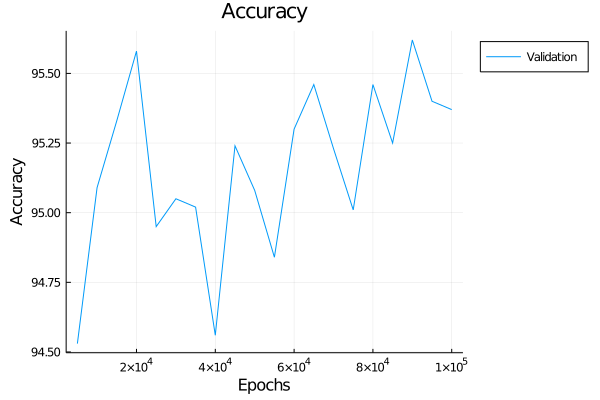

In [58]:
y_hold = y_val
plot(x_val, y_val, 
    label = "Validation",
    xlabel = "Epochs",
    ylabel = "Accuracy",
    title = "Accuracy", 
    legend  = :outertopright)



In [59]:
for i = 1:90000
    mini_batch_update!(NN, 2, train_data, 0.3)
    if i % 5000 == 0
        push!(x_val, i + 100000)
        push!(y_val, success_percentage_float(NN, test_data))
        
    end
end 

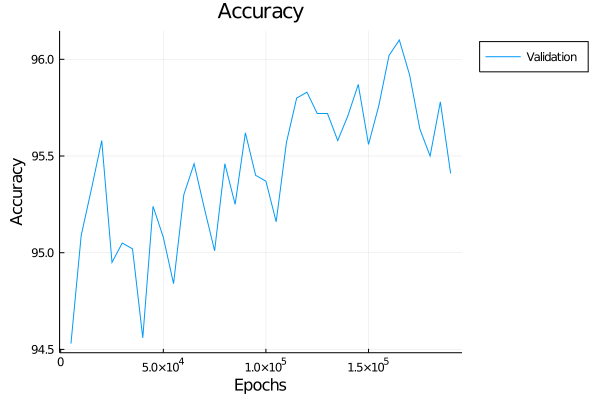

In [60]:
plot(x_val, y_val, 
    label = "Validation",
    xlabel = "Epochs",
    ylabel = "Accuracy",
    title = "Accuracy", 
    legend  = :outertopright)

In [61]:
for i = 1:60000
    mini_batch_update!(NN, 2, train_data, 0.2)
    if i % 5000 == 0
        push!(x_val, i + 190000)
        push!(y_val, success_percentage_float(NN, test_data))
        
    end
end 

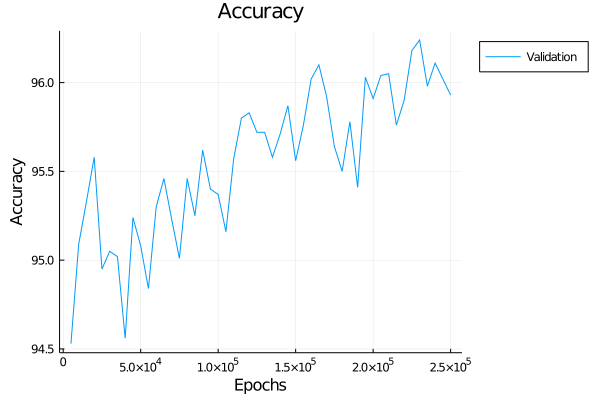

In [62]:
plot(x_val, y_val, 
    label = "Validation",
    xlabel = "Epochs",
    ylabel = "Accuracy",
    title = "Accuracy", 
    legend  = :outertopright)

In [63]:
for i = 1:50000
    mini_batch_update!(NN, 2, train_data, 0.1)
    if i % 5000 == 0
        push!(x_val, i + 250000)
        push!(y_val, success_percentage_float(NN, test_data))
        
    end
end 

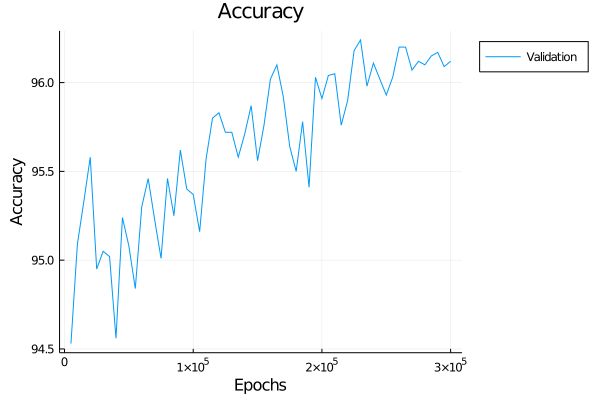

In [64]:
plot(x_val, y_val, 
    label = "Validation",
    xlabel = "Epochs",
    ylabel = "Accuracy",
    title = "Accuracy", 
    legend  = :outertopright)

In [65]:
for i = 1:30000
    mini_batch_update!(NN, 2, train_data, 0.05)
    if i % 5000 == 0
        push!(x_val, i + 300000)
        push!(y_val, success_percentage_float(NN, test_data))
        
    end
end 

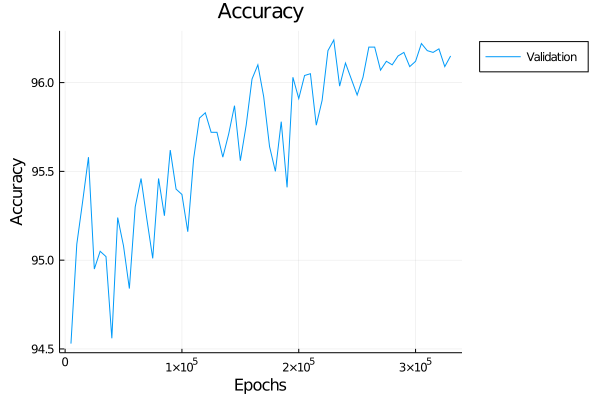

In [66]:
plot(x_val, y_val, 
    label = "Validation",
    xlabel = "Epochs",
    ylabel = "Accuracy",
    title = "Accuracy", 
    legend  = :outertopright)

In [67]:
for i = 1:25000
    mini_batch_update!(NN, 2, train_data, 0.05)
    if i % 5000 == 0
        push!(x_val, i + 330000)
        push!(y_val, success_percentage_float(NN, test_data))
        
    end
end 

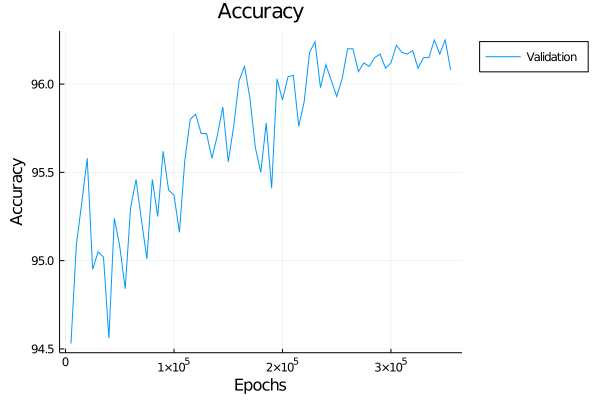

In [68]:
plot(x_val, y_val, 
    label = "Validation",
    xlabel = "Epochs",
    ylabel = "Accuracy",
    title = "Accuracy", 
    legend  = :outertopright)

In [75]:
success_percentage(NN, test_data)

"The percentage of correct classified images is: 96.23%"

___
Above, we trained our model using the nerual network 330,000 times. We included in our testing size in batches of 2 and step size or learning rate of .4 and .2. As a result, out model can predict around 94-95% of the numbered images in the test dataset. The percent that the data is correct on very much goes up and down depending on the data that is being tested on at the moment. 

___

With model training, we can see that the amount of times that we train the model is affecting the predict rate of the model. The more that we are able to train the model produces a greater value predict rate. What also affects the values of the model is the step size. As the model does get to higher points of a learn rate, it tends to do better with reduce step size in the algorithm raher than with the single one step size at the start of the model. 

___

Below, we test some outputs of the model and see if it can show us the right predictions of some numbers in our test dataset. 

In [76]:
function show_test_img(i)
    colorview(Gray, test_x[:,:,i])
end

function Predict_image(network::neural_network, i::Int64, testing_data)
    println("Predicted number: ", predict(network, test_data[i]))
    println("Actual Number: ", argmax(testing_data[i][2]) -1)
    show_test_img(i)
end

Predict_image (generic function with 1 method)

Predicted number: 0
Actual Number: 0


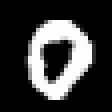

In [55]:
i  =  rand([x for x = 1:10000])
Predict_image(NN, i, test_data)

Predicted number: 2
Actual Number: 2


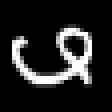

In [56]:
i  =  rand([x for x = 1:10000])
Predict_image(NN, i, test_data)

Predicted number: 8
Actual Number: 8


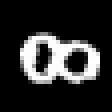

In [57]:
i  =  rand([x for x = 1:10000])
Predict_image(NN, i, test_data)

___
#### Conclusion 

Here today, we use Julia to build and train a neural network that is able to detect images of hand written numbers from a dataset. We started off with a untrained model that only produced 10% prediction rate. After we trained the model using the combination of sigmoid and backpropagation, we were able to get a much higher success rate of 95% accuracy rate at predicting numbers. 

In out training we found that the adjustment of the input variable make a significant impact on to the values that we work with. This includes the $\alpha$ or step size and the batch size that we use. Using an artificial neural network allows us to finely adjust values in our algorithm. We can use packages for machine learning to better improve our network by making use of other networks such as convolutional neural network. The higher values of accurecy can be achived with more training and adjustment of the inputs if were to train this model much more. 


___